In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm

In [2]:
df = pd.read_csv('SalaryData.csv')
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

1.State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.


In [4]:
#let us first change the variables into categorical type
df['Education'] = pd.Categorical(df['Education'])
df['Occupation'] = pd.Categorical(df['Occupation'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 864.0 bytes


In [5]:
print('Treatments of Education')
df['Education'].value_counts()

Treatments of Education


 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [6]:
print('Treatments of Occupation')
df['Occupation'].value_counts()

Treatments of Occupation


 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

2.Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [7]:
formula = ('Salary ~ C(Education)')
model = ols(formula, df).fit()
anova_table = anova_lm(model)
print('Fig:1 \nANOVA for Education')
anova_table

Fig:1 
ANOVA for Education


df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN

since p-value is less than alpha value we reject the null hypothesis (H0) for Education.

3.Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [8]:
formula = ('Salary ~ C(Occupation)')
model = ols(formula, df).fit()
anova_table = anova_lm(model)
print('Fig:2\nANOVA for Occupation')
anova_table

Fig:2
ANOVA for Occupation


df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN

since p-value is greater than alpha value we fail to reject the null hypothesis for Occupation.

4.If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
MC=pairwise_tukeyhsd(df['Salary'],df['Education'])
print('Fig:3')
print(MC)

Fig:3
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


The count of Salary mean are statistically different for each pair of Education level. Hence, reject=True

The mean count of salary differs in various levels of education. It is significantly higher for Bachelors-Doctorate than for Bachelors-HS-grad and Doctorate-HS-grad

1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

In [10]:
df['Education'] = df['Education'].astype(str)
df['Occupation'] = df['Occupation'].astype(str)

Fig:4


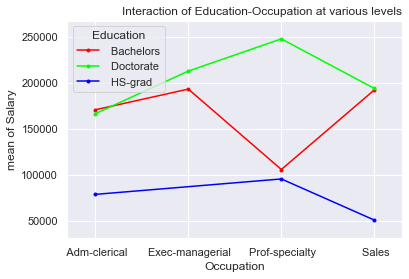

In [11]:
from statsmodels.graphics.factorplots import interaction_plot
print('Fig:4')
interaction_plot(df['Occupation'], df['Education'],df['Salary'])
plt.title('Interaction of Education-Occupation at various levels', loc='right')
plt.show()

From above plot we can figure out that people with educational level:

1.Doctorates : Higher salary brackets and are mostly in Prof-speciality roles or Exec-managerial roles or in sales profile, very few are doing Adm-clerical jobs

2.Bachlores: Fall in mid income range and found mostly working in Exec -managerial roles , Adm-clerks or into sales but very few are found in Prof- speciality profile.

3.HS-grads : Low income brackets, mostly doing Prof-speciality or Adm -clerical work and few are doing Sales but hardly any in Exec-managerial role.

1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?


H0 = The mean Salary variable for each Education level and Occupation type is equal

HA = For at least one of the means of Salary for Occupation type and Education level are unequal.

Where, alpha=0.05

if 
p-value is < 0.05 we reject the null hypothesis.

p-Value is >= 0.05 we fail to reject the null hypothesis.

In [12]:
formula = ('Salary ~ C(Occupation)+ C(Education)')
model = ols(formula, df).fit()
anova_table = anova_lm(model)
print('Fig:5\nTWO-WAY ANOVA on Occupation and Education')
anova_table

Fig:5
TWO-WAY ANOVA on Occupation and Education


df        sum_sq       mean_sq          F        PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09   2.284576  9.648715e-02
C(Education)    2.0  9.695663e+10  4.847831e+10  29.510933  3.708479e-08
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN

In the above table, the p-value for both Occupation and Education are lower than the alpha value. Therefore, we reject the null hypthesis. This implies that there is some level of interaction between the two treatments.

In [57]:
# adding interaction term
print('Fig:6 \nApplying Interacting Effect Term')
formula = ('Salary ~ C(Occupation)+ C(Education) + C(Occupation):C(Education)')
model = ols(formula, df).fit()
anova_table = anova_lm(model)
anova_table

Fig:6 
Applying Interacting Effect Term


df        sum_sq       mean_sq          F  \
C(Occupation)                3.0  1.125878e+10  3.752928e+09   5.277862   
C(Education)                 2.0  9.695663e+10  4.847831e+10  68.176603   
C(Occupation):C(Education)   6.0  3.523330e+10  5.872217e+09   8.258287   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Occupation)               4.993238e-03  
C(Education)                1.090908e-11  
C(Occupation):C(Education)  2.913740e-05  
Residual                             NaN

Due to introducing an interacting effect term we can see changes in p-values for the first 2 treatments as compared to the two-day ANOVA without the interaction effect term.


The p-value is lower than the alpha value therefore, we reject the null hypothesis.

1.7 Explain the business implications of performing ANOVA for this particular case study.


Analysis of Variance (ANOVA) is used for testing a hypothesis to understand how different groups respond to each other by making connections between independent and dependent variables. It helps in comparing the means of groups in order to determine if there is a difference between them. It is used when more than two group means are compared. For two group means, we can perform t-test.

In terms of business context for this particular case study, ANOVA helps manage salary by comparing education to occupation.

ANOVA can also be used to forecast Salary trends by analysing patterns in data to get a clearer picture on understanding the future hike of Salary.

As a statistical technique, it is widely used for comparing the relationship between factors that influence a hike in Salary, Some of the key takeaways from this case study are as follows:

i. Salary increases as Education level upgrades. On an average, Doctorate earns higher salary than Bachelors and HS-Grads. However, there is possibility that being Doctorate may not necessarily mean significant high salary than HS-Grad or Bachelors employees.

ii. Although the significance of Occupation is lesser than Education,it may impact Salary at certain level.

iii. There are instances where high salaries are offered to Bachelor’s degree holders than Doctorates for few occupations.

iv. ANOVA test indicates that the Education level combined with Occupation has significant influence over salary than their standalone counterpart.


Problem 2:

The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [14]:
Ed = pd.read_csv('Education+-+Post+12th+Standard.csv')
Ed.head(2)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56

In [15]:
Ed.tail(10)

Names   Apps  Accept  Enroll  Top10perc  \
767              Winthrop University   2320    1805     769         24   
768       Wisconsin Lutheran College    152     128      75         17   
769            Wittenberg University   1979    1739     575         42   
770                  Wofford College   1501     935     273         51   
771  Worcester Polytechnic Institute   2768    2314     682         49   
772          Worcester State College   2197    1515     543          4   
773                Xavier University   1959    1805     695         24   
774   Xavier University of Louisiana   2097    1915     695         34   
775                  Yale University  10705    2453    1317         95   
776     York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
767         61         3395          670      6400        3392    580   
768         41          282           22      9100        3700    500   
769         68         1980          144     15948        4404    400   
770         83         1059           34     12680        4150    605   
771         86         2802           86     15884        5370    530   
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
767      2150   71        80       12.8           26    6729         59  
768      1400   48        48        8.5           26    8960         50  
769       800   82        95       12.8           29   10414         78  
770      1440   91        92       15.3           42    7875         75  
771       730   92        94       15.2           34   10774         82  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

In [16]:
Ed['Names'].nunique()

777

In [17]:
Ed.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [18]:
Ed.duplicated().sum()

0

In [19]:
print('Fig:7\n')
Ed.info()

Fig:7

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory 

In [20]:
Ed['Names'].dtype

dtype('O')

In [21]:
print('Fig:8\nData Summary')
Ed.describe(include='all').T

Fig:8
Data Summary


count unique                           top freq          mean  \
Names          777    777  Abilene Christian University    1           NaN   
Apps         777.0    NaN                           NaN  NaN   3001.638353   
Accept       777.0    NaN                           NaN  NaN   2018.804376   
Enroll       777.0    NaN                           NaN  NaN    779.972973   
Top10perc    777.0    NaN                           NaN  NaN     27.558559   
Top25perc    777.0    NaN                           NaN  NaN     55.796654   
F.Undergrad  777.0    NaN                           NaN  NaN   3699.907336   
P.Undergrad  777.0    NaN                           NaN  NaN    855.298584   
Outstate     777.0    NaN                           NaN  NaN  10440.669241   
Room.Board   777.0    NaN                           NaN  NaN   4357.526384   
Books        777.0    NaN                           NaN  NaN    549.380952   
Personal     777.0    NaN                           NaN  NaN   1340.642214   
PhD          777.0    NaN                           NaN  NaN     72.660232   
Terminal     777.0    NaN                           NaN  NaN     79.702703   
S.F.Ratio    777.0    NaN                           NaN  NaN     14.089704   
perc.alumni  777.0    NaN                           NaN  NaN     22.743887   
Expend       777.0    NaN                           NaN  NaN   9660.171171   
Grad.Rate    777.0    NaN                           NaN  NaN      65.46332   

                     std     min     25%     50%      75%      max  
Names                NaN     NaN     NaN     NaN      NaN      NaN  
Apps         3870.201484    81.0   776.0  1558.0   3624.0  48094.0  
Accept       2451.113971    72.0   604.0  1110.0   2424.0  26330.0  
Enroll         929.17619    35.0   242.0   434.0    902.0   6392.0  
Top10perc      17.640364     1.0    15.0    23.0     35.0     96.0  
Top25perc      19.804778     9.0    41.0    54.0     69.0    100.0  
F.Undergrad  4850.420531   139.0   992.0  1707.0   4005.0  31643.0  
P.Undergrad  1522.431887     1.0    95.0   353.0    967.0  21836.0  
Outstate     4023.016484  2340.0  7320.0  9990.0  12925.0  21700.0  
Room.Board   1096.696416  1780.0  3597.0  4200.0   5050.0   8124.0  
Books          165.10536    96.0   470.0   500.0    600.0   2340.0  
Personal      677.071454   250.0   850.0  1200.0   1700.0   6800.0  
PhD            16.328155     8.0    62.0    75.0     85.0    103.0  
Terminal       14.722359    24.0    71.0    82.0     92.0    100.0  
S.F.Ratio       3.958349     2.5    11.5    13.6     16.5     39.8  
perc.alumni    12.391801     0.0    13.0    21.0     31.0     64.0  
Expend        5221.76844  3186.0  6751.0  8377.0  10830.0  56233.0  
Grad.Rate       17.17771    10.0    53.0    65.0     78.0    118.0

In [22]:
Ed[Ed['Grad.Rate']>100]

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
95  Cazenovia College  3847    3433     527          9         35   

    F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
95         1010           12      9384        4840    600       500   22   

    Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
95        47       14.3           20    7697        118

In [23]:
Ed[Ed['PhD']>100]

Names  Apps  Accept  Enroll  Top10perc  \
582  Texas A&M University at Galveston   529     481     243         22   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
582         47         1206          134      4860        3122    600   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
582       650  103        88       17.4           16    6415         43

In [24]:
Ed.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

Fig:9



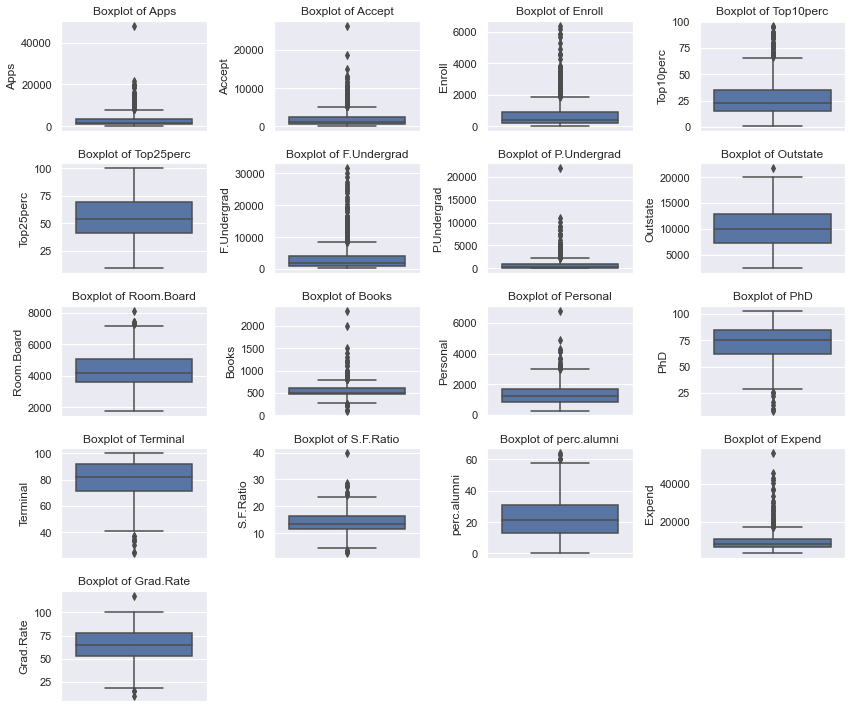

In [25]:
plt.figure(figsize = (12,10))
list = Ed.columns.drop('Names')
print('Fig:9\n')
for i in range(len(list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = Ed[list[i]], data = Ed)
    plt.title('Boxplot of {}'.format(list[i]))
    plt.tight_layout()

Fig:9
Box Plot of Data Showing Presence of Outliers


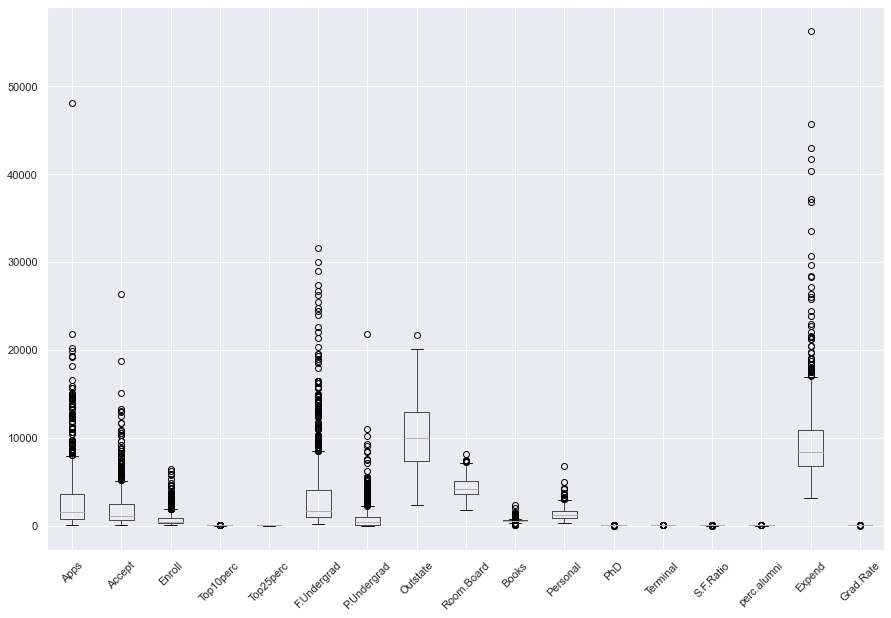

In [26]:
print('Fig:9\nBox Plot of Data Showing Presence of Outliers')
Ed.boxplot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

Fig:10
Distribution and Density plot of variables


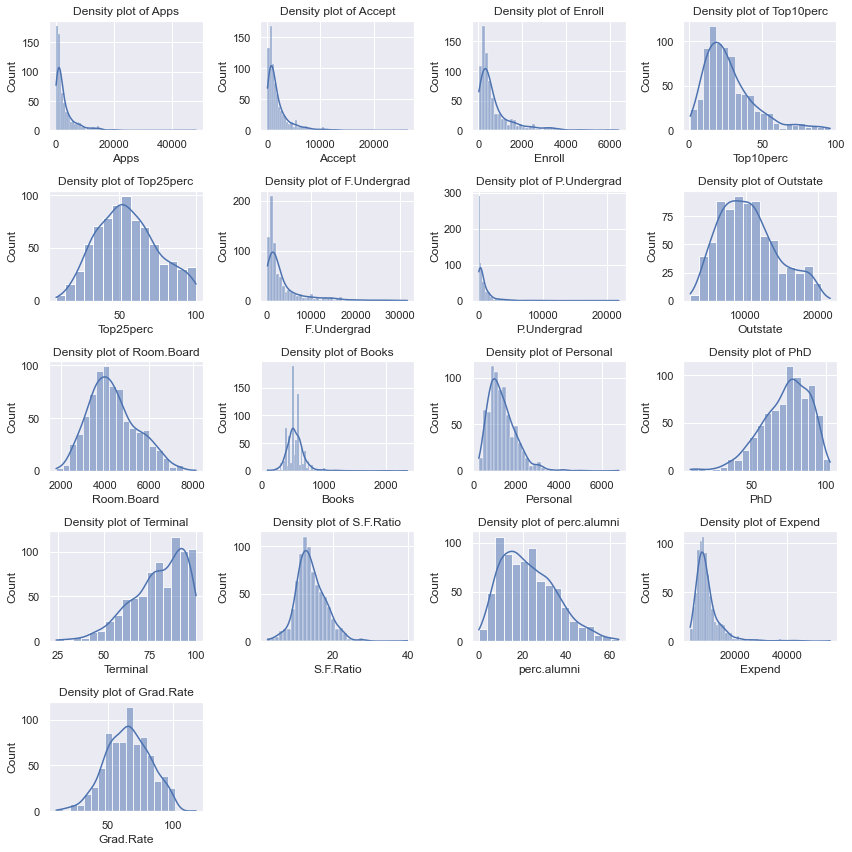

In [27]:
print('Fig:10\nDistribution and Density plot of variables')
plt.figure(figsize = (12,12))
for i in range(len(list)):
    plt.subplot(5, 4, i + 1)
    sns.histplot(x = Ed[list[i]], data = Ed, kde=True)
    plt.title('Density plot of {}'.format(list[i]))
    plt.tight_layout()

Pair Plot showing the relationship between the variables


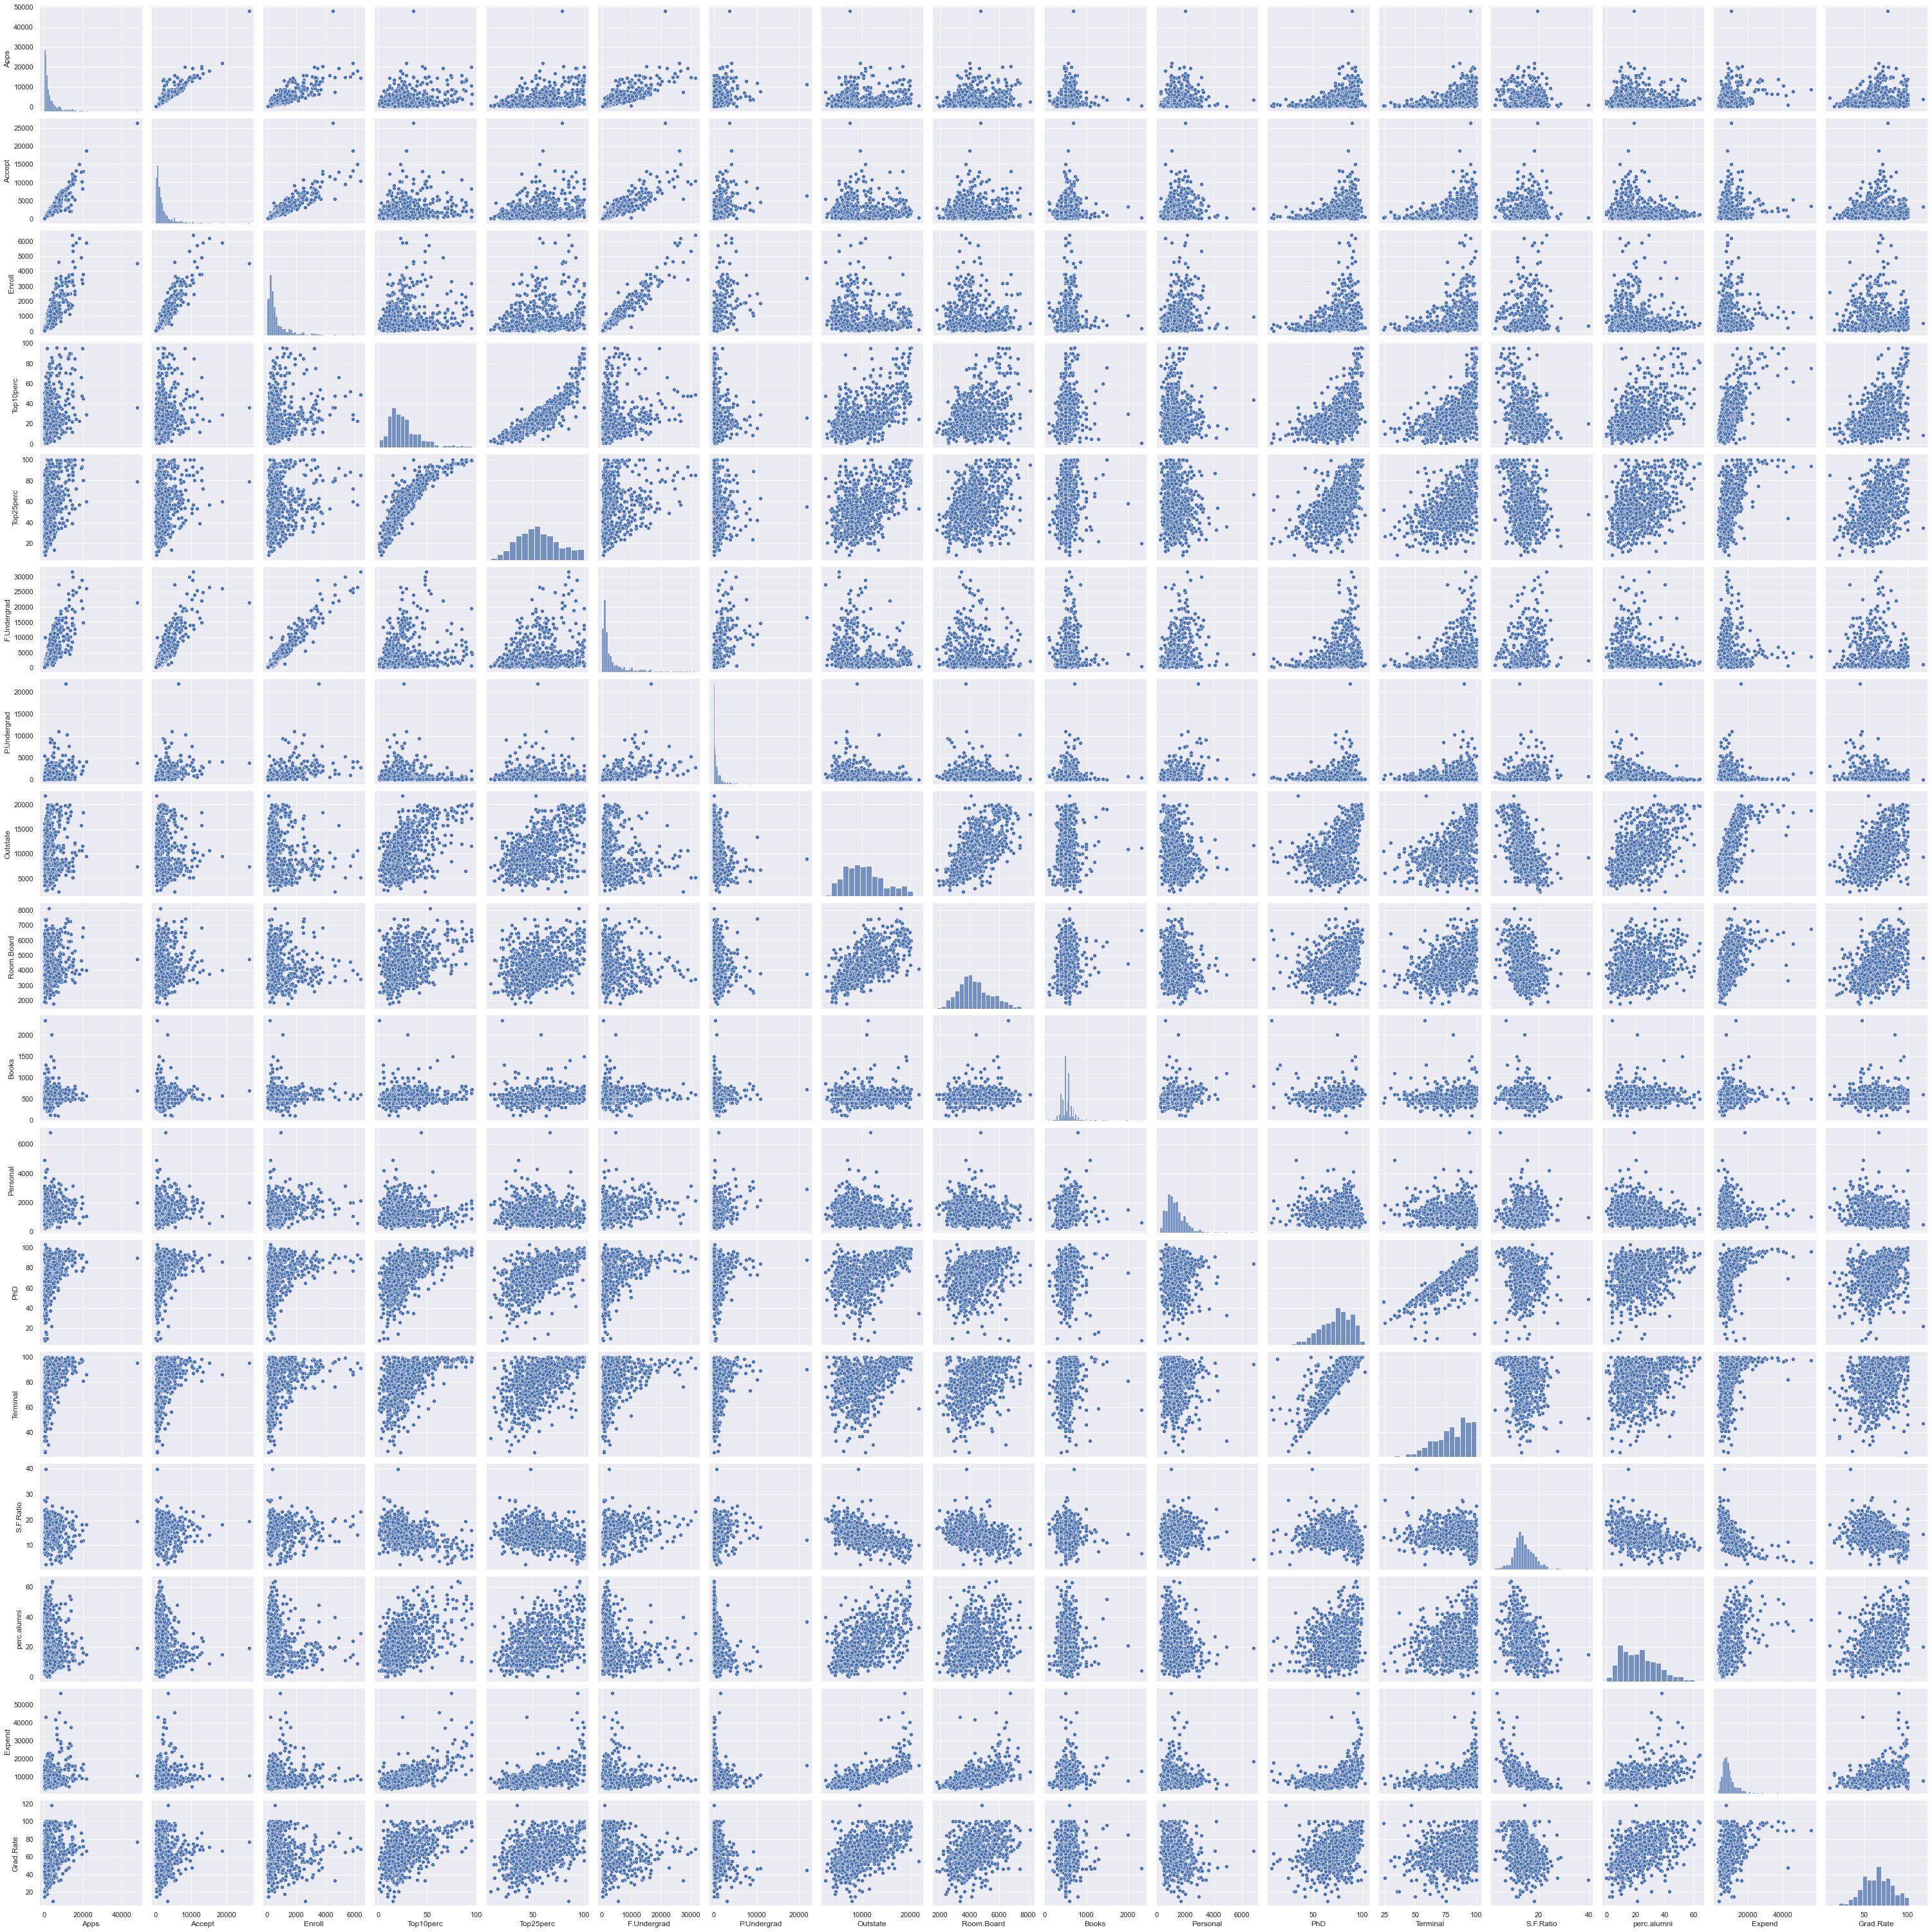

In [28]:
print('Pair Plot showing the relationship between the variables')
sns.pairplot(data=Ed)
plt.show()

Fig 10
 Heatmap showing the correlation between variables


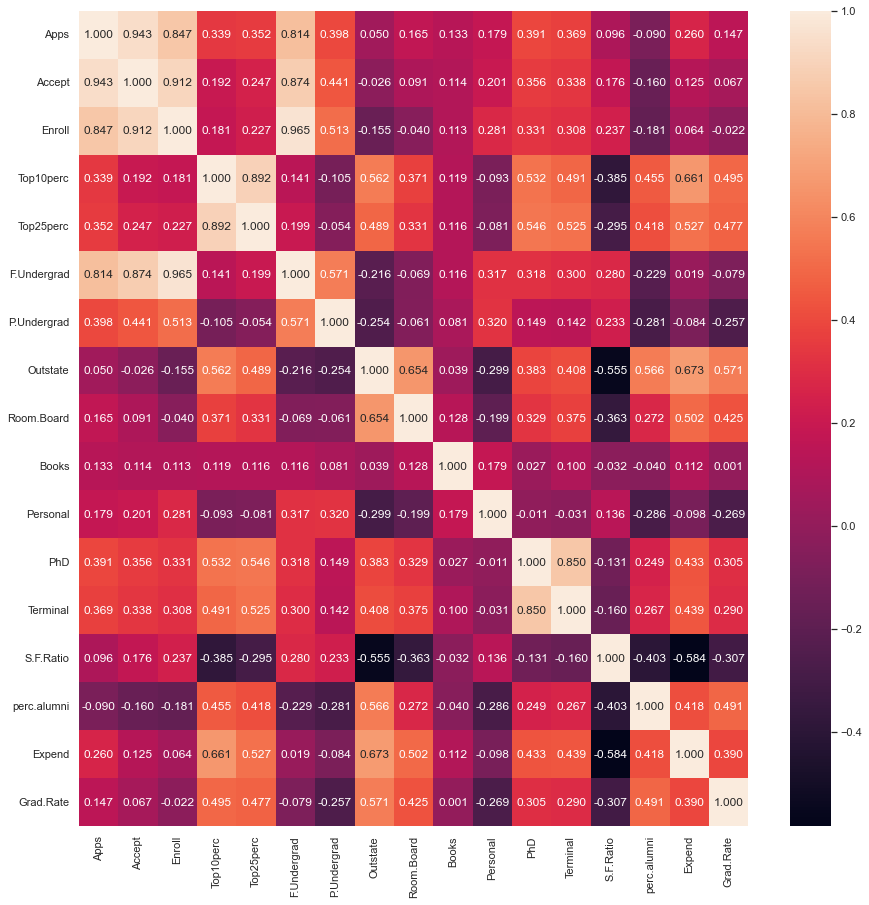

In [50]:
Ed_new = Ed.drop('Names', axis=1)
print('Fig 10\n Heatmap showing the correlation between variables')
plt.figure(figsize=(15,15))
sns.heatmap(data=Ed_new.corr(), annot=True, fmt='0.3f')
plt.show()

In [30]:
from scipy.stats import zscore
scaled_ed = Ed_new.apply(zscore)
scaled_ed

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0   -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1   -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2   -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3   -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4   -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   
..        ...       ...       ...        ...        ...          ...   
772 -0.208040 -0.205673 -0.255200  -1.336352  -1.505488    -0.126030   
773 -0.269575 -0.087284 -0.091509  -0.201858  -0.444454    -0.175543   
774 -0.233895 -0.042377 -0.091509   0.365389   0.262901    -0.187095   
775  1.991711  0.177256  0.578333   3.825595   2.182866     0.312977   
776 -0.003268 -0.066872 -0.095816   0.025041   0.363952    -0.146867   

     P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
0      -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028   
1       0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646   
2      -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845   
3      -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206   
4       0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672   
..           ...       ...         ...       ...       ...       ...   
772     0.771435 -0.906289   -0.417455 -0.299280 -0.207855 -0.775861   
773     0.165435  0.268462    0.549707  0.306784 -0.133960  0.020822   
774    -0.453053 -0.880670   -0.143730  0.409815 -0.827095 -0.346878   
775    -0.507606  2.337894    1.963953  0.488603  1.144424  1.430339   
776     0.572283 -1.355744   -0.727676 -0.299280 -0.133960  0.143389   

     Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   -0.115729   1.013776    -0.867574 -0.501910  -0.318252  
1   -3.378176  -0.477704    -0.544572  0.166110  -0.551262  
2   -0.931341  -0.300749     0.585935 -0.177290  -0.667767  
3    1.175657  -1.615274     1.151188  1.792851  -0.376504  
4   -0.523535  -0.553542    -1.675079  0.241803  -2.939613  
..        ...        ...          ...       ...        ...  
772 -1.339146   1.746877    -0.706073 -0.994781  -1.483301  
773 -0.319632  -0.199632     0.666685 -0.090290   1.021555  
774 -0.319632   0.078441    -0.221570 -0.256241  -0.959029  
775  1.107689  -2.095582     2.120194  5.887971   1.953595  
776 -0.319632   1.013776     0.424434 -0.987116   1.953595  

[777 rows x 17 columns]

Fig:13


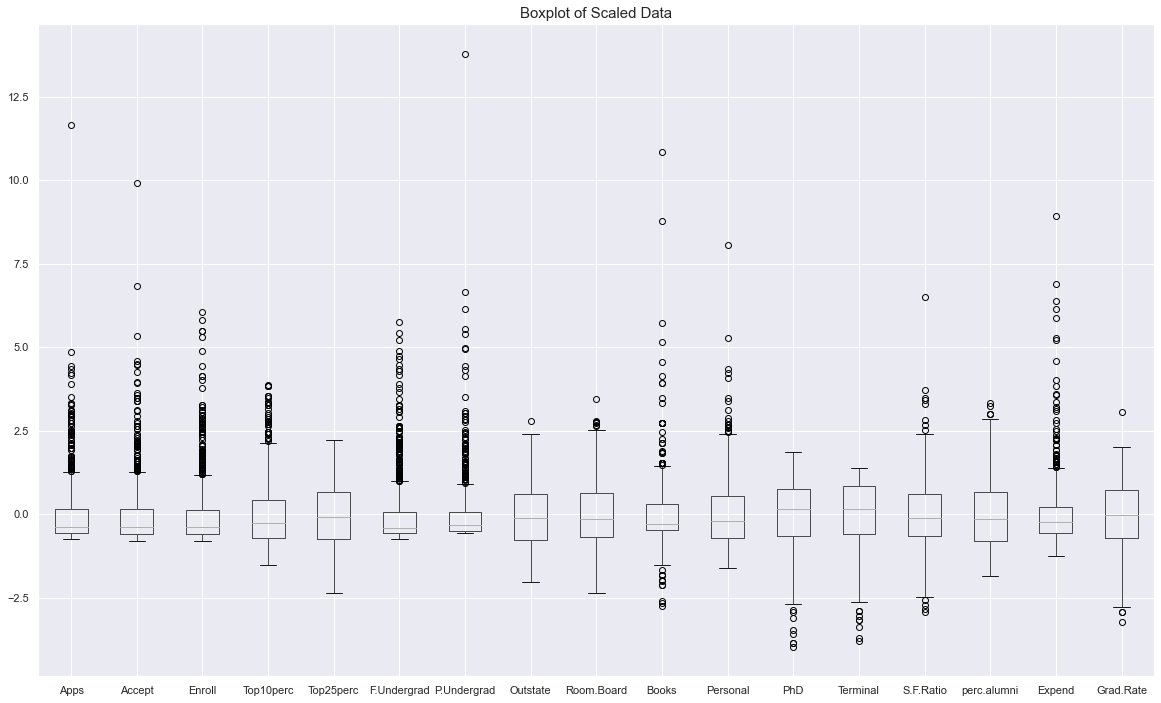

In [64]:
print('Fig:13')
scaled_ed.boxplot(figsize=(20,12))
plt.title('Boxplot of Scaled Data', fontsize=15)
plt.show()

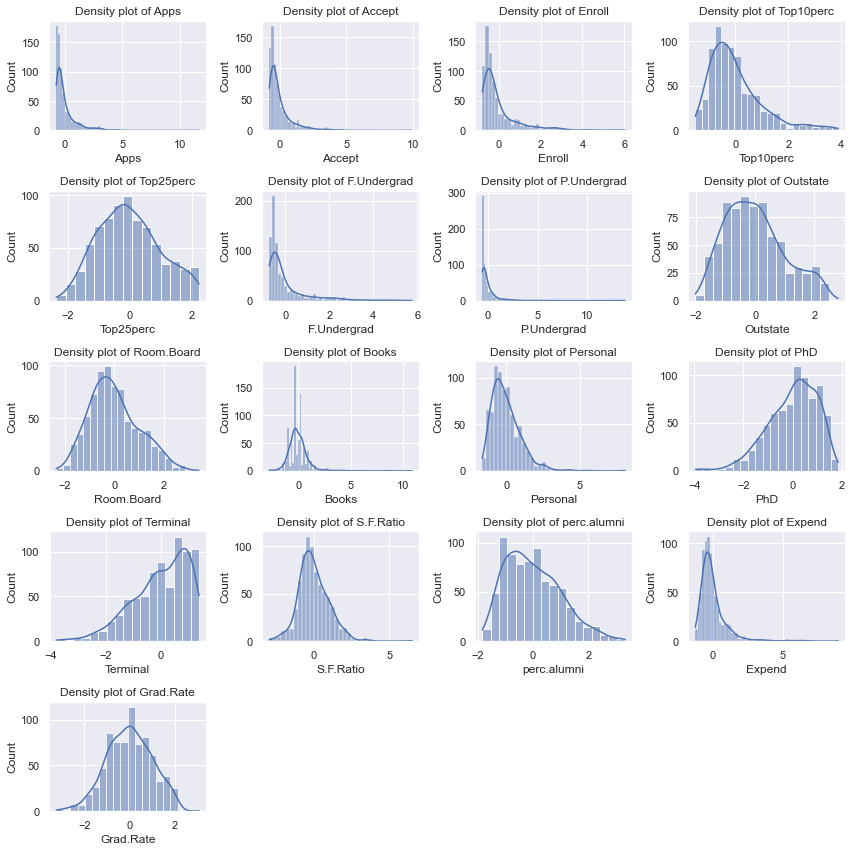

In [32]:
plt.figure(figsize = (12,12))
for i in range(len(list)):
    plt.subplot(5, 4, i + 1)
    sns.histplot(x = scaled_ed[list[i]], data = scaled_ed, kde=True)
    plt.title('Density plot of {}'.format(list[i]))
    plt.tight_layout()

In [52]:
print('Fig:11\nDescription of the scaled data')
scaled_ed.describe().T

Fig:11
Description of the scaled data


count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

Fig:12
Heatmap showing correlation between variables on scaled data set


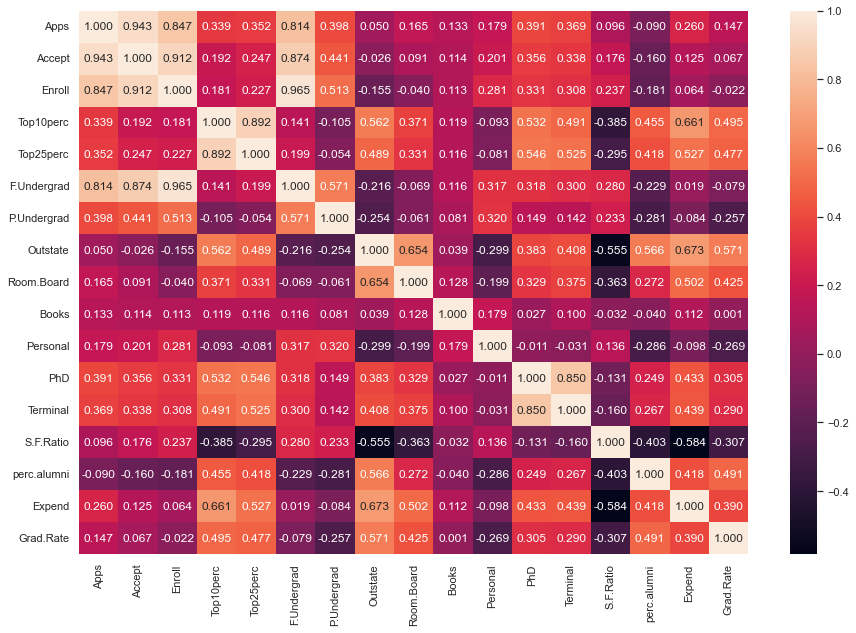

In [58]:
print('Fig:12\nHeatmap showing correlation between variables on scaled data set')
plt.figure(figsize=(15,10))
sns.heatmap(data=scaled_ed.corr(), annot=True, fmt='0.3f')
plt.show()

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(scaled_ed)

In [36]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [37]:
pca.components_.T

array([[ 2.48765602e-01,  3.31598227e-01, -6.30921033e-02,
         2.81310530e-01,  5.74140964e-03, -1.62374420e-02,
        -4.24863486e-02, -1.03090398e-01, -9.02270802e-02,
         5.25098025e-02,  4.30462074e-02,  2.40709086e-02,
         5.95830975e-01,  8.06328039e-02,  1.33405806e-01,
         4.59139498e-01,  3.58970400e-01],
       [ 2.07601502e-01,  3.72116750e-01, -1.01249056e-01,
         2.67817346e-01,  5.57860920e-02,  7.53468452e-03,
        -1.29497196e-02, -5.62709623e-02, -1.77864814e-01,
         4.11400844e-02, -5.84055850e-02, -1.45102446e-01,
         2.92642398e-01,  3.34674281e-02, -1.45497511e-01,
        -5.18568789e-01, -5.43427250e-01],
       [ 1.76303592e-01,  4.03724252e-01, -8.29855709e-02,
         1.61826771e-01, -5.56936353e-02, -4.25579803e-02,
        -2.76928937e-02,  5.86623552e-02, -1.28560713e-01,
         3.44879147e-02, -6.93988831e-02,  1.11431545e-02,
        -4.44638207e-01, -8.56967180e-02,  2.95896092e-02,
        -4.04318439e-01,  6.0

In [38]:
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [39]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [40]:
extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17'],
                                    index = scaled_ed.columns)
extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps        -0.042486 -0.103090 -0.090227  0.052510  0.043046  0.024071   
Accept      -0.012950 -0.056271 -0.177865  0.041140 -0.058406 -0.145102   
Enroll      -0.027693  0.058662 -0.128561  0.034488 -0.069399  0.011143   
Top10perc   -0.161332 -0.122678  0.341100  0.064026 -0.008105  0.038554   
Top25perc   -0.118486 -0.102492  0.403712  0.014549 -0.273128 -0.089352   
F.Undergrad -0.025076  0.078890 -0.059442  0.020847 -0.081158  0.056177   
P.Undergrad  0.061042  0.570784  0.560673 -0.223106  0.100693 -0.063536   
Outstate     0.108529  0.009846 -0.004573  0.186675  0.143221 -0.823444   
Room.Board   0.209744 -0.221453  0.275023  0.298324 -0.359322  0.354560   
Books       -0.149692  0.213293 -0.133663 -0.082029  0.031940 -0.028159   
Personal     0.633790 -0.232661 -0.094469  0.136028 -0.018578 -0.039264   
PhD         -0.001096 -0.077040 -0.185182 -0.123452  0.040372  0.023222   
Terminal    -0.028477 -0.012161 -0.254938 -0.088578 -0.058973  0.016485   
S.F.Ratio    0.219259 -0.083605  0.274544  0.472045  0.445001 -0.011026   
perc.alumni  0.243321  0.678524 -0.255335  0.423000 -0.130728  0.182661   
Expend      -0.226584 -0.054159 -0.049139  0.132286  0.692089  0.325982   
Grad.Rate    0.559944 -0.005336  0.041904 -0.590271  0.219839  0.122107   

                 PC13      PC14      PC15      PC16      PC17  
Apps         0.595831  0.080633  0.133406  0.459139  0.358970  
Accept       0.292642  0.033467 -0.145498 -0.518569 -0.543427  
Enroll      -0.444638 -0.085697  0.029590 -0.404318  0.609651  
Top10perc    0.001023 -0.107828  0.697723 -0.148739 -0.144986  
Top25perc    0.021884  0.151742 -0.617275  0.051868  0.080348  
F.Undergrad -0.523622 -0.056373  0.009916  0.560363 -0.414705  
P.Undergrad  0.125998  0.019286  0.020952 -0.052731  0.009018  
Outstate    -0.141856 -0.034012  0.038354  0.101595  0.050900  
Room.Board  -0.069749 -0.058429  0.003402 -0.025929  0.001146  
Books        0.011438 -0.066849 -0.009439  0.002883  0.000773  
Personal     0.039455  0.027529 -0.003090 -0.012890 -0.001114  
PhD          0.127696 -0.691126 -0.112056  0.029808  0.013813  
Terminal    -0.058313  0.671009  0.158910 -0.027076  0.006209  
S.F.Ratio   -0.017715  0.041374 -0.020899 -0.021248 -0.002222  
perc.alumni  0.104088 -0.027154 -0.008418  0.003334 -0.019187  
Expend      -0.093746  0.073123 -0.227742 -0.043880 -0.035310  
Grad.Rate   -0.069197  0.036477 -0.003394 -0.005008 -0.013071

Fig:14


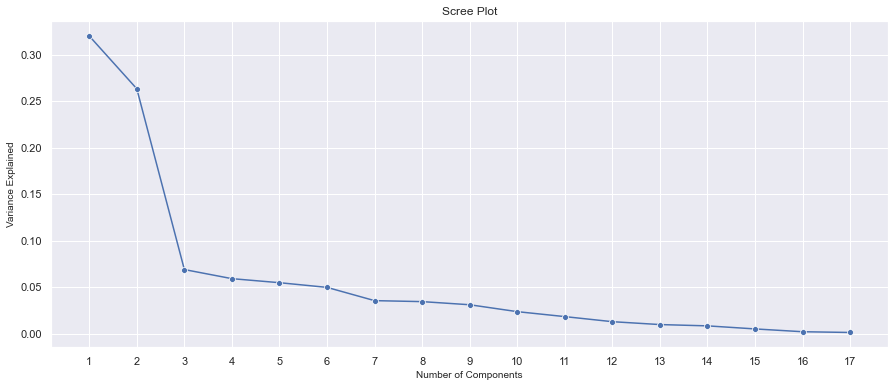

In [65]:
print('Fig:14')
plt.figure(figsize=(15,6))
sns.lineplot(y=pca.explained_variance_ratio_, x=range(1,len(pca.explained_variance_)+1), marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.xticks(range(1,18,1))
plt.show()

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

In [83]:
ed_selected = extracted_loadings[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']]
print('Fig:15\nEigenVectors of first 9 PCs')
ed_selected

Fig:15
EigenVectors of first 9 PCs


PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8       PC9  
Apps        -0.042486 -0.103090 -0.090227  
Accept      -0.012950 -0.056271 -0.177865  
Enroll      -0.027693  0.058662 -0.128561  
Top10perc   -0.161332 -0.122678  0.341100  
Top25perc   -0.118486 -0.102492  0.403712  
F.Undergrad -0.025076  0.078890 -0.059442  
P.Undergrad  0.061042  0.570784  0.560673  
Outstate     0.108529  0.009846 -0.004573  
Room.Board   0.209744 -0.221453  0.275023  
Books       -0.149692  0.213293 -0.133663  
Personal     0.633790 -0.232661 -0.094469  
PhD         -0.001096 -0.077040 -0.185182  
Terminal    -0.028477 -0.012161 -0.254938  
S.F.Ratio    0.219259 -0.083605  0.274544  
perc.alumni  0.243321  0.678524 -0.255335  
Expend      -0.226584 -0.054159 -0.049139  
Grad.Rate    0.559944 -0.005336  0.041904

In [84]:
ed_selected['PC1']

Apps           0.248766
Accept         0.207602
Enroll         0.176304
Top10perc      0.354274
Top25perc      0.344001
F.Undergrad    0.154641
P.Undergrad    0.026443
Outstate       0.294736
Room.Board     0.249030
Books          0.064758
Personal      -0.042529
PhD            0.318313
Terminal       0.317056
S.F.Ratio     -0.176958
perc.alumni    0.205082
Expend         0.318909
Grad.Rate      0.252316
Name: PC1, dtype: float64

Fig:16
Feature Spread Distribution


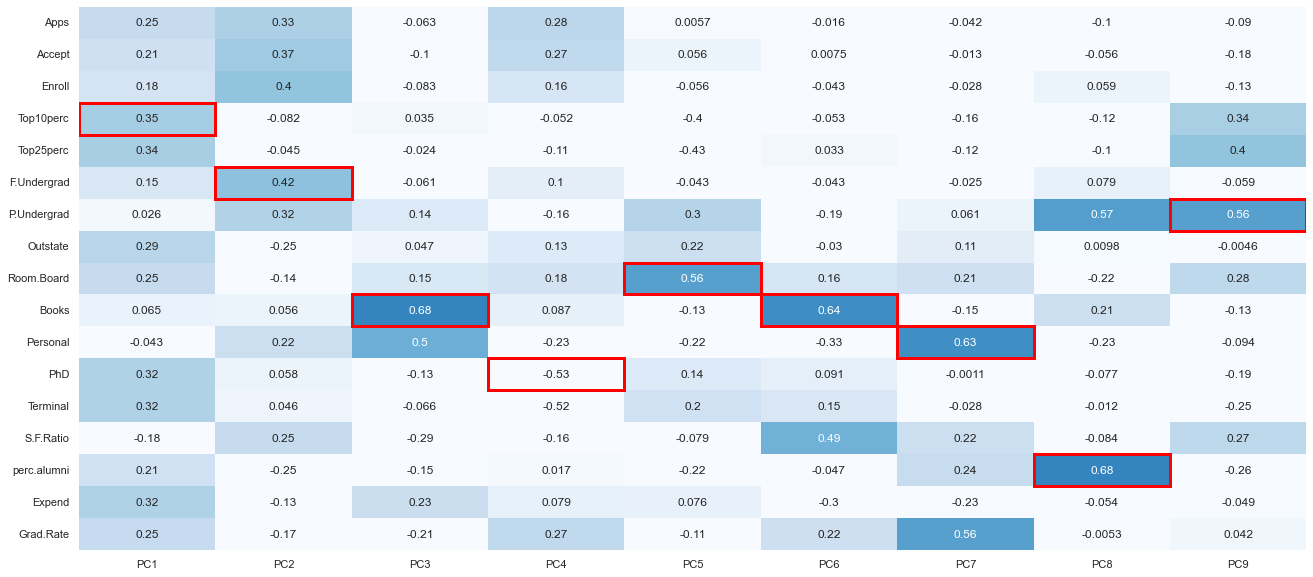

In [67]:
from matplotlib.patches import Rectangle
print('Fig:16\nFeature Spread Distribution')
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(ed_selected, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax)

column_max = ed_selected.abs().idxmax(axis=0)

for col, variable in enumerate(ed_selected.columns):
    position = ed_selected.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

Fig: 17


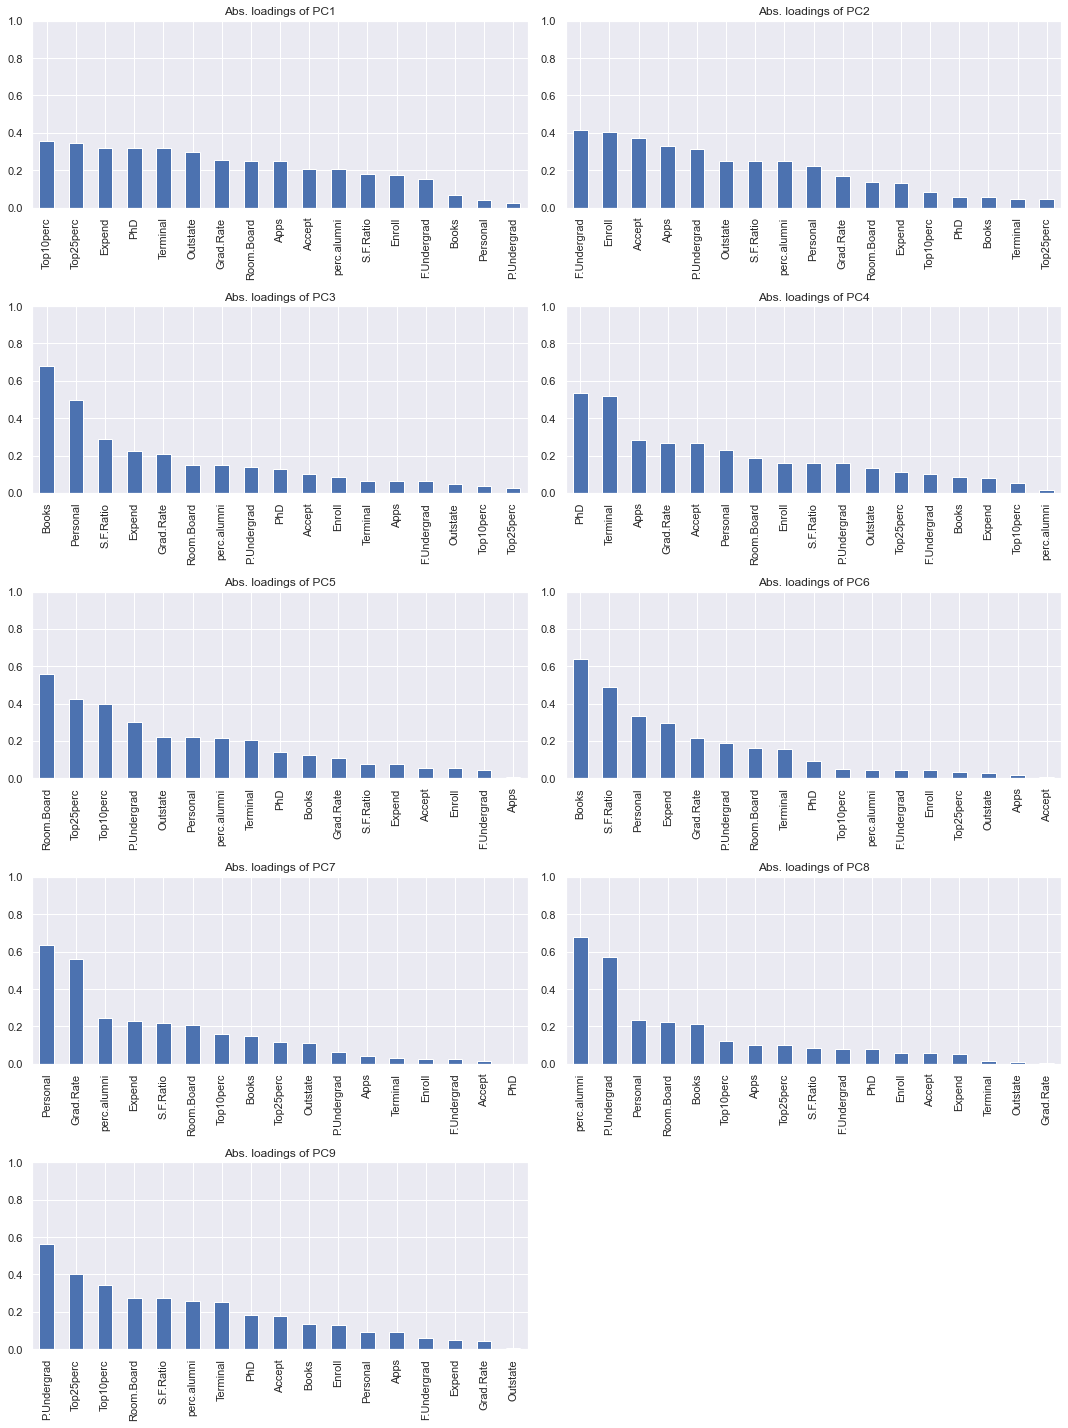

In [82]:
print('Fig: 17')
plt.figure(figsize = (15,20))
for i in range(len(ed_selected.columns)):
    plt.subplot(5,2,i+1)
    abs(ed_selected[ed_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(ed_selected.columns[i]))
    plt.tight_layout()

In [46]:
pca.explained_variance_
pca.explained_variance_ratio_
Total = sum(pca.explained_variance_)
Total
Cummulative = np.cumsum(pca.explained_variance_ratio_)


Fig:18
Comparison between Cummulative Explained Variance and Individual Explained Variance


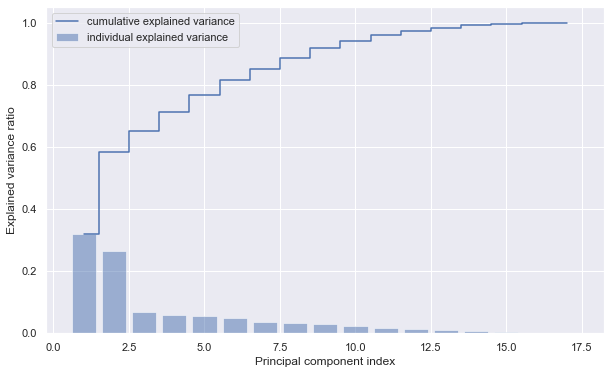

In [86]:
# plot explained variances
print('Fig:18\nComparison between Cummulative Explained Variance and Individual Explained Variance')
plt.figure(figsize=(10,6))
plt.bar(range(1,18), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,18), Cummulative, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()